# DATASETS PLAYGROUND

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error

In [74]:
# plot one or more 2D matrices using heatmap
# supports a 2D array, or flattened (uses DIMS to restore 1D to 2D)
def plot_matrix(dims, *datas):
    PLOTS_PER_ROW = 20
    cols = min(len(datas), PLOTS_PER_ROW)
    rows = math.ceil(len(datas)/PLOTS_PER_ROW)
    fig = plt.figure(figsize=(cols,rows))
    for i, data in enumerate(datas):
        if data.shape != dims:
            data = np.reshape(data, dims)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(data, cmap='gray')
        plt.axis('off')
        # plt.title(f"#{i}")
    plt.show()

# MNIST

In [199]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.datasets as datasets

from tqdm.notebook import tqdm


In [200]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [201]:
help(mnist_trainset)


Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
 |          and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transfo

In [202]:
mnist_data = mnist_trainset.train_data.cpu().detach().numpy()
mnist_data.shape

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(60000, 28, 28)

In [203]:
mnist_labels = mnist_trainset.train_labels.cpu().detach().numpy()
mnist_labels.shape

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(60000,)

## MNIST PCA

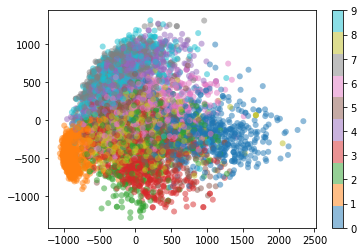

In [242]:
pca = PCA(n_components=2)

MNIST_DATA_SIZE = mnist_data.shape[0]
MNIST_SUBSET_SIZE = int(0.1 * MNIST_DATA_SIZE)
subsample_indexes = np.random.choice(MNIST_DATA_SIZE, MNIST_SUBSET_SIZE)
mnist_data_subsample = mnist_data[subsample_indexes]
# print(mnist_data_subsample.shape)
mnist_labels_subsample = mnist_labels[subsample_indexes]


pca_input = np.reshape(mnist_data_subsample, newshape=(MNIST_SUBSET_SIZE, 28*28))

pca_features = pca.fit_transform(pca_input)

plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=mnist_labels_subsample, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
# plt.xlabel('component 1')
# plt.ylabel('component 2')
plt.colorbar();

## MNIST LogReg
See [link](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist_samples_count = mnist_data.shape[0]
mnist_img_size = mnist_data.shape[1]

# flatten 2D images to continous vectors
mnist_data_1d = np.reshape(mnist_data, newshape=(mnist_samples_count, mnist_img_size*mnist_img_size))

mnist_train, mnist_test, mnist_train_labels, mnist_test_labels = train_test_split(
    mnist_data_1d, mnist_labels, test_size=0.1, random_state=0)

logReg = LogisticRegression(solver = 'lbfgs', multi_class="multinomial")

logReg.fit(mnist_train, mnist_train_labels)

score = logReg.score(mnist_test, mnist_test_labels)
print(score)


0.9265


/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


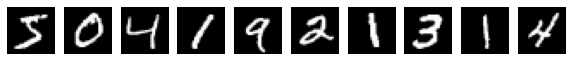

In [90]:
# draw a bunch
plot_matrix([28,28], *mnist_data[:10])

In [91]:

def get_label(idx):
    return mnist_labels[idx]


Samples count for digit 0: 5923.0
Samples count for digit 1: 6742.0
Samples count for digit 2: 5958.0
Samples count for digit 3: 6131.0
Samples count for digit 4: 5842.0
Samples count for digit 5: 5421.0
Samples count for digit 6: 5918.0
Samples count for digit 7: 6265.0
Samples count for digit 8: 5851.0
Samples count for digit 9: 5949.0


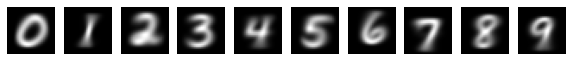

In [92]:
# squash all samples per class onto single image

squashed = []
samples_count_per_class = np.zeros(10) # also count samples per class
samples_count = len(mnist_data)

for i in range(10):
    squashed.append(np.zeros(shape=[28,28]))

for i, d in enumerate(mnist_data):
    digit = get_label(i)
    samples_count_per_class[digit] += 1
    s = squashed[digit]
    squashed[digit] = s + d / 256
    
for d in squashed:
    d = d / samples_count
    

for i, d in enumerate(squashed):
    print(f"Samples count for digit {i}: {samples_count_per_class[i]}")
    
plot_matrix([28,28], *squashed)

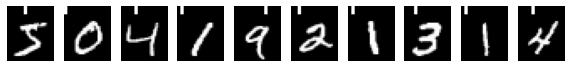

In [95]:
def get_input(idx):
    # normalise to be between 0 and 1
    return mnist_data[idx] / 256.0

# labels can be extra row(s) in the image
label_rows = np.zeros(shape=[10,28])
for i in range(10):
    # 2 pixels per label 
    label_rows[i][i*2] = 1.0
    label_rows[i][i*2+1] = 1.0
    
# print(label_rows)

LABEL_BAND_HEIGHT = 5
def get_input_with_label(idx):
    image = get_input(idx)
    digit = get_label(idx)
    label_row = label_rows[digit]
    # add N extra rows at the top
    label_band = np.vstack([label_row] * LABEL_BAND_HEIGHT)
    return np.vstack([label_band, image])

# show few
plot_matrix([28+LABEL_BAND_HEIGHT,28], *[get_input_with_label(i) for i in range(10)])

    

In [96]:
# optionally reduce the number of classes to specific digits
enabled_classes = set(range(10)) # set([6,9]) #

new_data = []
new_labels = []
if len(enabled_classes) < 10:
    for i, l in enumerate(mnist_labels):
        if l in enabled_classes:
            new_data.append(mnist_data[i])
            new_labels.append(l)
    
    mnist_data = np.array(new_data)
    mnist_labels = np.array(new_labels)

print(mnist_data.shape)
print(mnist_labels.shape)

(60000, 28, 28)
(60000,)


# CIFAR

In [109]:

datasets.CIFAR10(root = './data/cifar-10-torch', train = True, transform = None, download = True)


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████    | 164303899/170498071 [19:04<00:43, 143616.56it/s]


RuntimeError: File not found or corrupted.

# CATS & DOGS

In [105]:
import torch 
from torchvision import datasets, transforms
from torchvision.transforms.functional import crop



In [47]:
test_dataset = datasets.ImageFolder('./data/kagglecatsanddogs_5340/PetImages/', 
                               transform=transforms.Compose([
                                 transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.Grayscale(1),
                                 #transforms.ToPILImage(),
                                 transforms.RandomAutocontrast(1.0), # values will be between 0 and 1
                                 transforms.ToTensor()
                               ]))

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)


In [53]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ./data/kagglecatsanddogs_5340/PetImages/
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               Grayscale(num_output_channels=1)
               RandomAutocontrast(p=1.0)
               ToTensor()
           )

In [54]:
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)


(-0.5, 223.5, 223.5, -0.5)

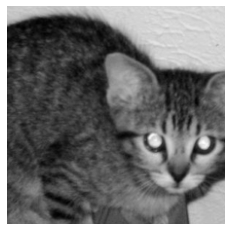

In [62]:

def get_cats_dogs_sample_crop():
    img = None
    while img is None:
        try:
            images, labels = next(iter(test_dataset))
            # converty to numpy 2D array
            img = images[0].cpu().detach().numpy().squeeze()
            #print(img.shape)
        except:
            pass
    return img

img = get_cats_dogs_sample_crop()
#plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')

## ENTROPY


In [141]:
import torch
import scipy

In [106]:
data = np.zeros(shape=(100,10))


In [111]:
# create 1-hot vectors
for i in range(data.shape[0]):
    data[i,...][np.random.randint(data.shape[1])] = 1

In [ ]:
scipy.stats.entropy(pk,

In [119]:
# torch.tensor([-1,1,2,0,.4])

ent = []
for i in range(100):
    e = torch.special.entr(torch.randn(10))
    ent.append(e)

# print(ent)
# plt.hist(ent, density=True, bins=30)  

In [147]:
"""
calculate discrete entropy by binning values
"""
def entropy(numbers, range=(0, 1)):
    h, bin_edges = np.histogram(numbers, bins=100, density=False, range=range)
    h = h / h.max() # normalise
    entropy = scipy.stats.entropy(h)
    return entropy


(array([ 5.,  9., 15., 25., 20., 14.,  6.,  4.,  1.,  1.]),
 array([0.30229835, 0.35345444, 0.40461052, 0.45576661, 0.5069227 ,
        0.55807879, 0.60923487, 0.66039096, 0.71154705, 0.76270313,
        0.81385922]),
 <BarContainer object of 10 artists>)

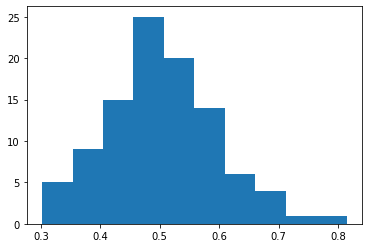

In [161]:
numbers = np.random.normal(loc=0.5, scale=0.1, size=(100))
#np.histogram(numbers)
plt.hist(numbers)

In [153]:
entropy(numbers)


3.4195310174687212

In [197]:
print("Entropy of 100 numbers:")
print(f"Zeros: {entropy(np.zeros(100))}")
print(f"Ones: {entropy(np.ones(100))}")
print(f"One-hot: {entropy(np.eye(100)[np.random.randint(100)])}")
print(f"One-cold: {entropy((1-np.eye(100))[np.random.randint(100)])}")
print(f"Two-hot: {entropy(np.concatenate([np.ones(2), np.zeros(98)]))}")
print(f"Three-hot: {entropy(np.concatenate([np.ones(3), np.zeros(97)]))}")
print(f"Half-hot: {entropy(np.concatenate([np.zeros(50), np.ones(50)]))}")
print(f"Uniform: {entropy(np.random.rand(100))}")
print(f"Normal: {entropy(np.random.normal(loc=0.5, scale=0.1, size=(100)))}")

Entropy of 100 numbers:
Zeros: 0.0
Ones: 0.0
One-hot: 0.056001534354847345
One-cold: 0.056001534354847345
Two-hot: 0.098039113279732
Three-hot: 0.13474216817976667
Half-hot: 0.6931471805599453
Uniform: 3.9724362406430194
Normal: 3.4506548854270274


## Use Torch to build CNN

Example from:

https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/#:~:text=Max%20pooling%20is%20a%20pooling,of%20the%20previous%20feature%20map.

Docs:
* https://pytorch.org/docs/stable/generated/torch.nn.functional.max_pool2d.html#torch.nn.functional.max_pool2d
* https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html#torch.nn.functional.conv2d


### MAX POOLING

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [65]:


# define input image
image = np.array([[2, 2, 7, 3],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]])

image = image.reshape(1, 4, 4)

print(image)
  
# Keras:
# define model containing just a single max pooling layer
# model = Sequential(
#     [MaxPooling2D(pool_size = 2, strides = 2)])
# # generate pooled output
# output = model.predict(image)
# # print output image
# output = np.squeeze(output)
# print(output)

# input – input tensor of shape (minibatch,in_channels,iH,iW)
input = torch.from_numpy(image).unsqueeze(dim=0).float()
print(input.shape)

# pool of square window of size=3, stride=2
# m = nn.MaxPool2d(2, stride=2)
output_torch = F.max_pool2d(input, 2, stride=2, padding=0)

# pool of non-square window
# m = nn.MaxPool2d((3, 2), stride=(2, 1))
# input = torch.randn(20, 16, 50, 32)
# output_torch = m(input)

print(output_torch)

output = np.squeeze(output_torch)

print(output)


[[[2 2 7 3]
  [9 4 6 1]
  [8 5 2 4]
  [3 1 2 6]]]
torch.Size([1, 1, 4, 4])
tensor([[[[9., 7.],
          [8., 6.]]]])
tensor([[9., 7.],
        [8., 6.]])


### CONV 2D

In [99]:
# This is pluggable into Neuron class as a similarity function
# (I believe it uses dot product under the hood, so no benefit - i've already tried it)

dims = (3,3)
pattern = np.array([[1,0,0],[0,1,0],[0,0,1]]).flatten()
kernel = np.array([[1,0,0],[0,1,0],[0,0,1]]).flatten()

def torch_conv2d_similarity(dims, pattern, kernel):
    pt = torch.tensor(pattern).reshape(1,1,dims[0],dims[1]).float()
    kt = torch.tensor(kernel).reshape(1,1,dims[0],dims[1]).float()
    print(pt.shape)
    print(kt.shape)

    outt = F.conv2d(pt, kt, bias=None, stride=1, padding=0, dilation=1, groups=1)

    print(outt)
    print(outt.shape)

    assert outt.shape == (1,1,1,1)
    signal = outt.view(-1).numpy()[0]
    
    return signal
    
    
print(torch_conv2d_similarity(dims, pattern, kernel))

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 3, 3])
tensor([[[[3.]]]])
torch.Size([1, 1, 1, 1])
3.0


In [78]:

pattern = torch.tensor([
    [1,0,0,0,0,0,1],
    [0,1,0,0,0,1,0],
    [0,0,1,0,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,0,0,1,0],
    [1,0,0,0,0,0,1]
]).float().unsqueeze(dim=0).unsqueeze(dim=0)

print(pattern)
print(pattern.shape)

kernels = torch.tensor([
    
    [[1,0,0],[0,1,0],[0,0,1]],
    [[0,0,0],[0,0,0],[0,0,0]],
    [[1,1,1],[1,1,1],[1,1,1]]
    
]).float().unsqueeze(dim=1)

print(kernels.shape)

# input - tensor of shape (minibatch,in_channels,iH,iW)
# weight – filters of shape (out_channels, in_channels/groups,kH,kW)
output_torch = F.conv2d(pattern, kernels, bias=None, stride=1, padding=0, dilation=1, groups=1)

print(output_torch)
print(output_torch.shape)


tensor([[[[1., 0., 0., 0., 0., 0., 1.],
          [0., 1., 0., 0., 0., 1., 0.],
          [0., 0., 1., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 1., 0., 0.],
          [0., 1., 0., 0., 0., 1., 0.],
          [1., 0., 0., 0., 0., 0., 1.]]]])
torch.Size([1, 1, 7, 7])
torch.Size([3, 1, 3, 3])
tensor([[[[3., 0., 1., 0., 1.],
          [0., 3., 0., 1., 0.],
          [1., 0., 3., 0., 1.],
          [0., 1., 0., 3., 0.],
          [1., 0., 1., 0., 3.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[3., 2., 2., 2., 3.],
          [2., 3., 3., 3., 2.],
          [2., 3., 5., 3., 2.],
          [2., 3., 3., 3., 2.],
          [3., 2., 2., 2., 3.]]]])
torch.Size([1, 3, 5, 5])


In [75]:

# input – input tensor of shape (minibatch,in_channels,iH,iW)
input = torch.from_numpy(img).unsqueeze(dim=0).unsqueeze(dim=0)
print(input)
print(input.shape)

kernels = torch.tensor([
    
    [[1,0,0],[0,1,0],[0,0,1]],
    [[0,0,0],[0,0,0],[0,0,0]],
    [[1,1,1],[1,1,1],[1,1,1]]
    
]).float().unsqueeze(dim=1)

print(kernels.shape)

# input - tensor of shape (minibatch,in_channels,iH,iW)
# weight – filters of shape (out_channels, in_channels/groups,kH,kW)
output_torch = F.conv2d(input, kernels, bias=None, stride=1, padding=0, dilation=1, groups=1)

print(output_torch)
print(output_torch.shape)

# output = np.squeeze(output_torch)

# eg
# # With square kernels and equal stride
# filters = torch.randn(8, 4, 3, 3)
# inputs = torch.randn(1, 4, 5, 5)
# F.conv2d(inputs, filters, padding=1)

tensor([[[[0.7529, 0.7569, 0.7647,  ..., 0.8353, 0.8392, 0.8353],
          [0.7725, 0.7686, 0.7647,  ..., 0.8314, 0.8471, 0.8392],
          [0.7843, 0.7804, 0.7804,  ..., 0.8431, 0.8392, 0.8314],
          ...,
          [0.3804, 0.3765, 0.3843,  ..., 0.7216, 0.7294, 0.7137],
          [0.3843, 0.3608, 0.3569,  ..., 0.7255, 0.7333, 0.7294],
          [0.3647, 0.3490, 0.3529,  ..., 0.7451, 0.7333, 0.7451]]]])
torch.Size([1, 1, 224, 224])
torch.Size([3, 1, 3, 3])
tensor([[[[2.3020, 2.2902, 2.2902,  ..., 2.5176, 2.5020, 2.5137],
          [2.3490, 2.3412, 2.3176,  ..., 2.5333, 2.5216, 2.5020],
          [2.3725, 2.3725, 2.3686,  ..., 2.5647, 2.5333, 2.5176],
          ...,
          [1.1333, 1.1608, 1.2000,  ..., 2.2196, 2.2196, 2.1922],
          [1.1137, 1.1255, 1.1843,  ..., 2.1922, 2.2000, 2.1922],
          [1.0941, 1.0980, 1.1412,  ..., 2.1804, 2.1765, 2.2000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.00

### Conv + MaxPool on an image

In [81]:
input = torch.from_numpy(img).unsqueeze(dim=0).unsqueeze(dim=0)
print("INPUT", input)
print(input.shape)

kernels = torch.tensor([
    
    [[1,0,0],[0,1,0],[0,0,1]],
    [[0,0,0],[0,0,0],[0,0,0]],
    [[1,1,1],[1,1,1],[1,1,1]]
    
]).float().unsqueeze(dim=1)

print("KERNELS", kernels.shape)

# CONV 2D
# input - tensor of shape (minibatch,in_channels,iH,iW)
# weight – filters of shape (out_channels, in_channels/groups,kH,kW)
output_conv = F.conv2d(input, kernels, bias=None, stride=1, padding=0, dilation=1, groups=1)

print("OUTPUT_CONV", output_conv)
print(output_conv.shape)

# MAX POOL 2D
output_maxpool = F.max_pool2d(output_conv, 2, stride=2, padding=0)

print("OUTPUT_MAXPOOL", output_maxpool)
print(output_maxpool.shape)

output = np.squeeze(output_maxpool)


INPUT tensor([[[[0.7529, 0.7569, 0.7647,  ..., 0.8353, 0.8392, 0.8353],
          [0.7725, 0.7686, 0.7647,  ..., 0.8314, 0.8471, 0.8392],
          [0.7843, 0.7804, 0.7804,  ..., 0.8431, 0.8392, 0.8314],
          ...,
          [0.3804, 0.3765, 0.3843,  ..., 0.7216, 0.7294, 0.7137],
          [0.3843, 0.3608, 0.3569,  ..., 0.7255, 0.7333, 0.7294],
          [0.3647, 0.3490, 0.3529,  ..., 0.7451, 0.7333, 0.7451]]]])
torch.Size([1, 1, 224, 224])
KERNELS torch.Size([3, 1, 3, 3])
OUTPUT_CONV tensor([[[[2.3020, 2.2902, 2.2902,  ..., 2.5176, 2.5020, 2.5137],
          [2.3490, 2.3412, 2.3176,  ..., 2.5333, 2.5216, 2.5020],
          [2.3725, 2.3725, 2.3686,  ..., 2.5647, 2.5333, 2.5176],
          ...,
          [1.1333, 1.1608, 1.2000,  ..., 2.2196, 2.2196, 2.1922],
          [1.1137, 1.1255, 1.1843,  ..., 2.1922, 2.2000, 2.1922],
          [1.0941, 1.0980, 1.1412,  ..., 2.1804, 2.1765, 2.2000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 